In [1]:
import pandas as pd
import numpy as np

import re

from dateutil import parser
import locale

In [2]:
df = pd.read_csv('news_2.csv', names = ['Title', 'Date', 'Source', 'Text', 'Stock'])
df = df.drop([0,1,2,3])
df.head()

,Title,Date,Source,Text,Stock
4,Индийские компании ведут переговоры о поставка...,2024-02-09T10:59:34+03:00,https://invst.ly/13d--w,Подписчикам Доступ к профессиональным продукта...,rosneft
5,"НОВАТЭК рекомендовал дивиденды в размере 44,09...",Опубликовано 09.02.2024 17:14,https://ru.investing.com/news/stock-market-new...,Investing.com — Совет директоров НОВАТЭКа ...,novatek
6,Топ-10 акций на рынке РФ по версии брокера ВТБ,Опубликовано 22.01.2024 17:46,https://ru.investing.com/news/stock-market-new...,Investing.com — Аналитики броке...,tatneft
7,Лукойл назвал размер своей доли в Яндексе посл...,Опубликовано 05.02.2024 10:59,https://ru.investing.com/news/personal-finance...,Investing.com — После закрытия сделки по ...,lukoil
8,ЕС не заинтересован в продлении транзита росси...,Опубликовано 15.02.2024 12:53,https://ru.investing.com/news/commodities-news...,Investing.com — Европейский союз не видит ...,gazprom


In [3]:
df.describe()

,Title,Date,Source,Text,Stock
count,20196,20196,20196,20196,20196
unique,16965,5624,221,17027,10
top,Назван самый дорогой бренд России,2016-11-15 00:00:00+00:00,lenta.ru,\n\n \n \n \n \n \n...,газпром
freq,7,49,19633,6,12928


In [4]:
df = df.drop_duplicates()
df

,Title,Date,Source,Text,Stock
4,Индийские компании ведут переговоры о поставка...,2024-02-09T10:59:34+03:00,https://invst.ly/13d--w,Подписчикам Доступ к профессиональным продукта...,rosneft
5,"НОВАТЭК рекомендовал дивиденды в размере 44,09...",Опубликовано 09.02.2024 17:14,https://ru.investing.com/news/stock-market-new...,Investing.com — Совет директоров НОВАТЭКа ...,novatek
6,Топ-10 акций на рынке РФ по версии брокера ВТБ,Опубликовано 22.01.2024 17:46,https://ru.investing.com/news/stock-market-new...,Investing.com — Аналитики броке...,tatneft
7,Лукойл назвал размер своей доли в Яндексе посл...,Опубликовано 05.02.2024 10:59,https://ru.investing.com/news/personal-finance...,Investing.com — После закрытия сделки по ...,lukoil
8,ЕС не заинтересован в продлении транзита росси...,Опубликовано 15.02.2024 12:53,https://ru.investing.com/news/commodities-news...,Investing.com — Европейский союз не видит ...,gazprom
...,...,...,...,...,...
20195,Сотрудники ФСБ пришли к спасателям Росморречфл...,2019-11-26 00:00:00+00:00,lenta.ru,Сотрудники ФСБ проводят обыски и изымают докум...,лукойл
20196,Мара Багдасарян решила искать защиты у Путина,2019-11-30 00:00:00+00:00,lenta.ru,Стритрейсерша Мара Багдасарян намерена обратит...,лукойл
20197,Российские олигархи начали богатеть гораздо бы...,2019-12-02 00:00:00+00:00,lenta.ru,"Совокупное состояние россиян, входящих в списо...",лукойл
20198,«Лукойл» отмечен международной наградой за про...,2019-12-05 00:00:00+00:00,lenta.ru,«Лукойл» выиграл премию «За лучший кросс-культ...,лукойл


In [5]:
df['Date'] = df['Date'].str.replace('Опубликовано', '')
df['Date'] = df['Date'].str.strip()
df

,Title,Date,Source,Text,Stock
4,Индийские компании ведут переговоры о поставка...,2024-02-09T10:59:34+03:00,https://invst.ly/13d--w,Подписчикам Доступ к профессиональным продукта...,rosneft
5,"НОВАТЭК рекомендовал дивиденды в размере 44,09...",09.02.2024 17:14,https://ru.investing.com/news/stock-market-new...,Investing.com — Совет директоров НОВАТЭКа ...,novatek
6,Топ-10 акций на рынке РФ по версии брокера ВТБ,22.01.2024 17:46,https://ru.investing.com/news/stock-market-new...,Investing.com — Аналитики броке...,tatneft
7,Лукойл назвал размер своей доли в Яндексе посл...,05.02.2024 10:59,https://ru.investing.com/news/personal-finance...,Investing.com — После закрытия сделки по ...,lukoil
8,ЕС не заинтересован в продлении транзита росси...,15.02.2024 12:53,https://ru.investing.com/news/commodities-news...,Investing.com — Европейский союз не видит ...,gazprom
...,...,...,...,...,...
20195,Сотрудники ФСБ пришли к спасателям Росморречфл...,2019-11-26 00:00:00+00:00,lenta.ru,Сотрудники ФСБ проводят обыски и изымают докум...,лукойл
20196,Мара Багдасарян решила искать защиты у Путина,2019-11-30 00:00:00+00:00,lenta.ru,Стритрейсерша Мара Багдасарян намерена обратит...,лукойл
20197,Российские олигархи начали богатеть гораздо бы...,2019-12-02 00:00:00+00:00,lenta.ru,"Совокупное состояние россиян, входящих в списо...",лукойл
20198,«Лукойл» отмечен международной наградой за про...,2019-12-05 00:00:00+00:00,lenta.ru,«Лукойл» выиграл премию «За лучший кросс-культ...,лукойл


In [6]:
df['Date'] = df['Date'].apply(lambda x: re.sub(r'\s*\(обновлено:\s+\d+:\d+\s+\d+\.\d+\.\d+\)', '', x))
df['Date'] = df['Date'].apply(lambda x: re.sub(r'\s*\(обновлено:\s+\d+:\d+\s+\d+\.\d+\.\d+\)', '', x))

In [7]:
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

unrecognized_dates = []

for i, date_str in enumerate(df['Date']):
    try:
        date_str = parser.parse(date_str)
        date_str = pd.to_datetime(date_str, dayfirst=True)
    except:
        try:
            date_str = pd.to_datetime(date_str, format="%H:%M, %d %B %Y")
        except:
            try:
                date_str = pd.to_datetime(int(date_str), unit='s')
            except:
                unrecognized_dates.append(date_str)
        else:
            df.at[i, 'Date'] = date_str
    else:
        df.at[i, 'Date'] = date_str
        
print(len(unrecognized_dates))


0


In [8]:
from dateutil import parser

# Функция для удаления часового пояса из строки даты
def remove_timezone(date_str):
    # Разделить строку по символу "+", если есть часовой пояс
    parts = date_str.split('+')
    if len(parts) > 1:
        # Вернуть только первую часть (без часового пояса)
        return parts[0]
    else:
        return date_str  # Если часовой пояс отсутствует, вернуть исходную строку
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].apply(remove_timezone)
df.head()

,Title,Date,Source,Text,Stock
4,Индийские компании ведут переговоры о поставка...,2024-02-15 12:53:00,https://invst.ly/13d--w,Подписчикам Доступ к профессиональным продукта...,rosneft
5,"НОВАТЭК рекомендовал дивиденды в размере 44,09...",2024-08-02 10:49:00,https://ru.investing.com/news/stock-market-new...,Investing.com — Совет директоров НОВАТЭКа ...,novatek
6,Топ-10 акций на рынке РФ по версии брокера ВТБ,2024-02-03 17:54:02,https://ru.investing.com/news/stock-market-new...,Investing.com — Аналитики броке...,tatneft
7,Лукойл назвал размер своей доли в Яндексе посл...,2024-02-02 15:40:55,https://ru.investing.com/news/personal-finance...,Investing.com — После закрытия сделки по ...,lukoil
8,ЕС не заинтересован в продлении транзита росси...,2024-02-14 16:47:10,https://ru.investing.com/news/commodities-news...,Investing.com — Европейский союз не видит ...,gazprom


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')

In [10]:
df = df.drop(df[df['Date'].isnull()].index)
df = df.dropna(how='any')

In [11]:
df.reset_index(drop=True)

,Title,Date,Source,Text,Stock
0,Индийские компании ведут переговоры о поставка...,2024-02-15 12:53:00,https://invst.ly/13d--w,Подписчикам Доступ к профессиональным продукта...,rosneft
1,"НОВАТЭК рекомендовал дивиденды в размере 44,09...",2024-08-02 10:49:00,https://ru.investing.com/news/stock-market-new...,Investing.com — Совет директоров НОВАТЭКа ...,novatek
2,Топ-10 акций на рынке РФ по версии брокера ВТБ,2024-02-03 17:54:02,https://ru.investing.com/news/stock-market-new...,Investing.com — Аналитики броке...,tatneft
3,Лукойл назвал размер своей доли в Яндексе посл...,2024-02-02 15:40:55,https://ru.investing.com/news/personal-finance...,Investing.com — После закрытия сделки по ...,lukoil
4,ЕС не заинтересован в продлении транзита росси...,2024-02-14 16:47:10,https://ru.investing.com/news/commodities-news...,Investing.com — Европейский союз не видит ...,gazprom
...,...,...,...,...,...
20188,Сотрудники ФСБ пришли к спасателям Росморречфл...,2019-12-06 00:00:00,lenta.ru,Сотрудники ФСБ проводят обыски и изымают докум...,лукойл
20189,Мара Багдасарян решила искать защиты у Путина,2019-11-30 00:00:00,lenta.ru,Стритрейсерша Мара Багдасарян намерена обратит...,лукойл
20190,Российские олигархи начали богатеть гораздо бы...,2019-12-02 00:00:00,lenta.ru,"Совокупное состояние россиян, входящих в списо...",лукойл
20191,«Лукойл» отмечен международной наградой за про...,2019-12-05 00:00:00,lenta.ru,«Лукойл» выиграл премию «За лучший кросс-культ...,лукойл



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


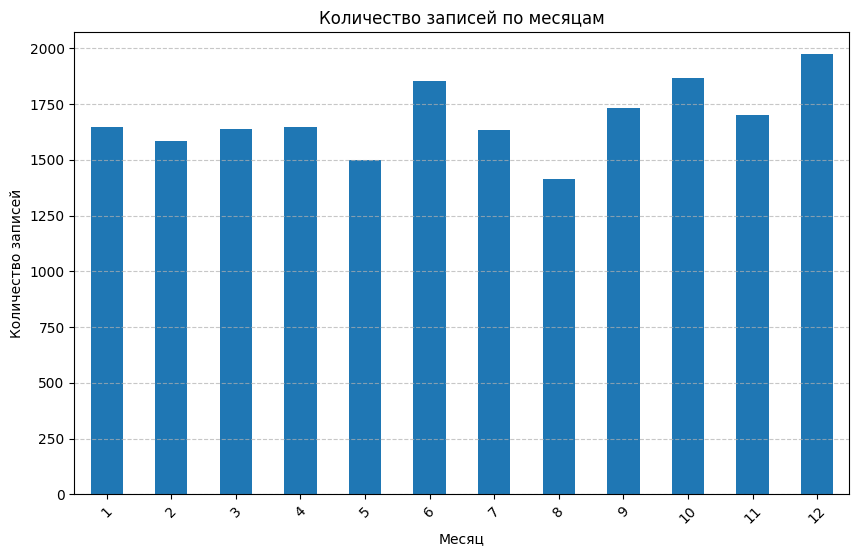

In [12]:
!pip install matplotlib

import matplotlib.pyplot as plt
df_temp = df.copy()
df_temp['Month'] = df['Date'].dt.month

monthly_counts = df_temp.groupby('Month').size()

# Создать график
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Количество записей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


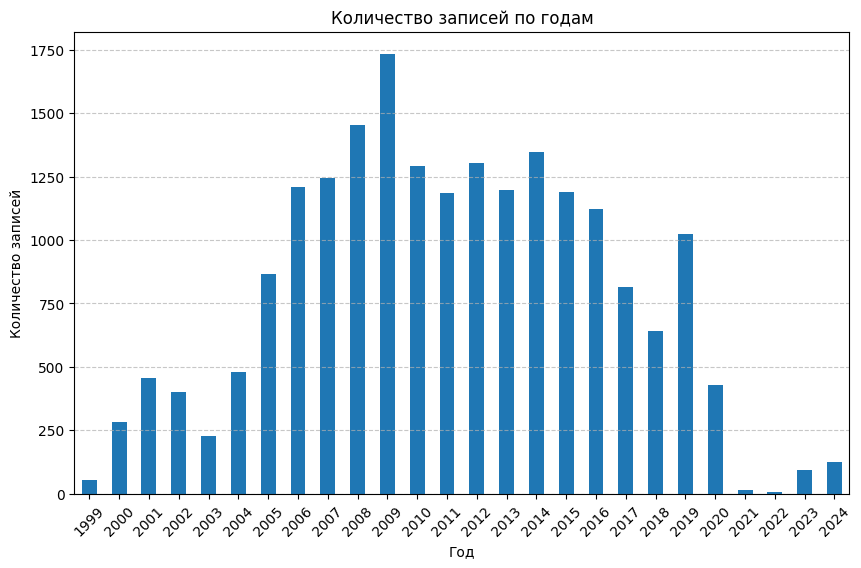

In [13]:
df_temp['Year'] = df['Date'].dt.year

monthly_counts = df_temp.groupby('Year').size()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Количество записей по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
df['Title'] = df['Title'].astype(str)
df['Source'] = df['Source'].astype(str)
df['Text'] = df['Text'].astype(str)

In [15]:
df.dtypes

Title             object
Date      datetime64[ns]
Source            object
Text              object
Stock             object
dtype: object

In [16]:
df.loc[df['Source'].str.contains('inv'), 'Source'] = 'investing.com'

In [17]:
df['Stock'] = df['Stock'].replace(['gazprom', 'газпром'], 'GAZP')
df['Stock'] = df['Stock'].replace(['rosneft', 'роснефть'], 'ROSN')
df['Stock'] = df['Stock'].replace(['lukoil', 'лукойл'], 'LKOH')
df['Stock'] = df['Stock'].replace(['novatek', 'новатэк'], 'NVTK')
df['Stock'] = df['Stock'].replace(['tatneft', 'татнефть'], 'TATN')
df['Stock'] = df['Stock'].replace(['bashneft', 'башнефть'], 'BANE')

In [18]:
df.groupby(df['Stock']).count()

,Title,Date,Source,Text
Stock,,,,
BANE,352,352,352,352
GAZP,13023,13023,13023,13023
LKOH,2890,2890,2890,2890
NVTK,598,598,598,598
ROSN,3310,3310,3310,3310
TATN,20,20,20,20


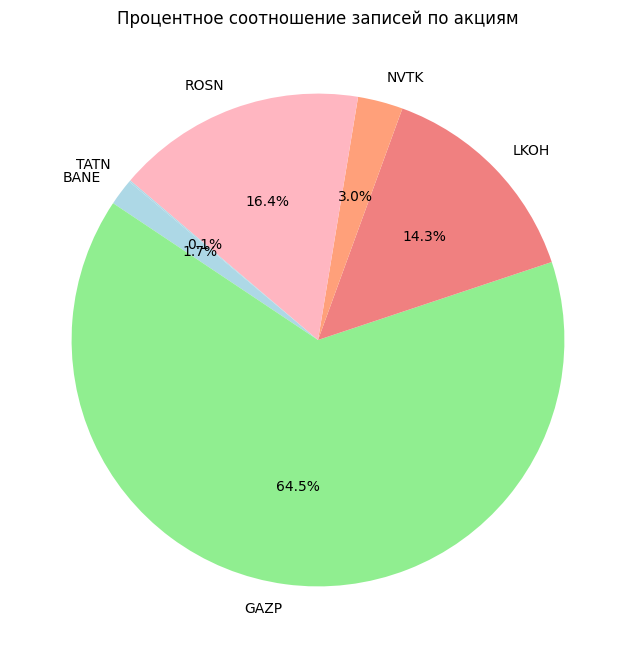

In [19]:
stock_counts = df.groupby('Stock').size()

plt.figure(figsize=(8, 8))
plt.pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Процентное соотношение записей по акциям')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [21]:
df['Text'][6]

'Стоимость строительства газопровода Джубга-Лазаревское-Сочи составит 25 миллиардов рублей. Об этом заявил председатель правления "Газпрома" Алексей Миллер, сообщает РИА Новости. Газопровод входит в перечень объектов, строящихся для проведения Олимпийских игр 2014 года в Сочи. Он добавил, что строительство газопровода является одним из приоритетов в инвестиционной программе "Газпрома". "Мы сделаем все, чтобы в середине следующего года газ пришел в Сочи", - сказал глава газового монополиста. Интересно, что в инвестиционном соглашении о строительстве газопровода 2004 года, стоимость морской части объекта оценивалась всего лишь в 270 миллионов рублей. 28 сентября "Газпром" начал строительство сухопутного участка трубопровода. Морской участок начнет строиться в феврале следующего года, а окончание всего строительства намечено на июнь 2010 года. Длина сухопутных участков составит около 20 километров, а морских - около 159 километров.  Газопровод пройдет по дну Черного моря на расстоянии 4-5

In [22]:
df['Text'] = df['Text'].replace('\n', '', regex=True)
df['Title'] = df['Title'].replace('\n', '', regex=True)
df['Text'] = df['Text'].replace('\s+', ' ', regex=True)

In [23]:
df['Target'] = 0

In [24]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


!pip install string

In [25]:
import string

def remove_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join(filter(lambda x: not x.isdigit(), text))
    text = text.replace('«', '').replace('»', '').replace('—', '')
    return text

df['Text_preprocessed'] = df['Text'].apply(remove_punctuation)

df['Text_preprocessed'] = df['Text_preprocessed'].str.lower()

In [26]:
!pip install razdel


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [27]:
from razdel import tokenize

def tokenize_text(text):
    return [token.text for token in tokenize(text)]

df['Tokens'] = df['Text_preprocessed'].apply(tokenize_text)

In [28]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [29]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    tokens_without_stopwords = [word for word in text if word not in stop_words]
    return tokens_without_stopwords

df['Tokens'] = df['Tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/portnovaxenia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df['Tokens']

0        [миноритарный, акционер, газпрома, леонид, про...
1        [следственный, комитет, россии, возбудил, одно...
2        [роснефть, выиграла, аукцион, крупнейший, учас...
3        [москва, фев, риа, новости, власти, украины, о...
4        [совокупное, состояние, самых, успешных, росси...
                               ...                        
20188    [мечел, договорился, газпромбанком, продаже, д...
20189    [генеральный, директор, компании, газпромнефть...
20190    [январе, года, суммарный, убыток, основной, де...
20191    [глава, холдинга, медиамост, владимир, гусинск...
20192    [российская, нефтяная, компания, роснефть, при...
Name: Tokens, Length: 20193, dtype: object

In [31]:
!pip install pymystem3


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [32]:
from pymystem3 import Mystem

mystem = Mystem()

def lemmatize_and_stem(tokens):
    lemmas = mystem.lemmatize(" ".join(tokens))
    return lemmas

df['Tokens'] = df['Tokens'].apply(lemmatize_and_stem)

In [33]:
df['Tokens']

0        [миноритарный,  , акционер,  , газпром,  , лео...
1        [следственный,  , комитет,  , россия,  , возбу...
2        [роснефть,  , выигрывать,  , аукцион,  , крупн...
3        [москва,  , фев,  , риа,  , новость,  , власть...
4        [совокупный,  , состояние,  , самый,  , успешн...
                               ...                        
20188    [мечесть,  , договариваться,  , газпромбанк,  ...
20189    [генеральный,  , директор,  , компания,  , газ...
20190    [январь,  , год,  , суммарный,  , убыток,  , о...
20191    [глава,  , холдинг,  , медиамост,  , владимир,...
20192    [российский,  , нефтяной,  , компания,  , росн...
Name: Tokens, Length: 20193, dtype: object

In [34]:
from collections import Counter

all_text = ' '.join(map(str, df['Tokens']))

token_freq = Counter(all_text.split())

print(token_freq.most_common(30))

[("',", 3252804), ("'", 3252795), ("'год',", 53828), ("'компания',", 47193), ("'газпром',", 35602), ("'процент',", 32277), ("'газ',", 30148), ("'миллиард',", 26991), ("'россия',", 26225), ("'который',", 25666), ("'российский',", 25094), ("'доллар',", 24241), ("'\\n']", 20193), ("'роснефть',", 18887), ("'акция',", 17232), ("'украина',", 15600), ("'сообщать',", 15504), ("'также',", 15082), ("'рубль',", 14314), ("'заявлять',", 14062), ("'нефть',", 13537), ("'миллион',", 12685), ("'составлять',", 12466), ("'цена',", 12279), ("'проект',", 11341), ("'поставка',", 10924), ("'кубометр',", 10243), ("'отмечать',", 9878), ("'рынок',", 9543), ("'страна',", 9061)]


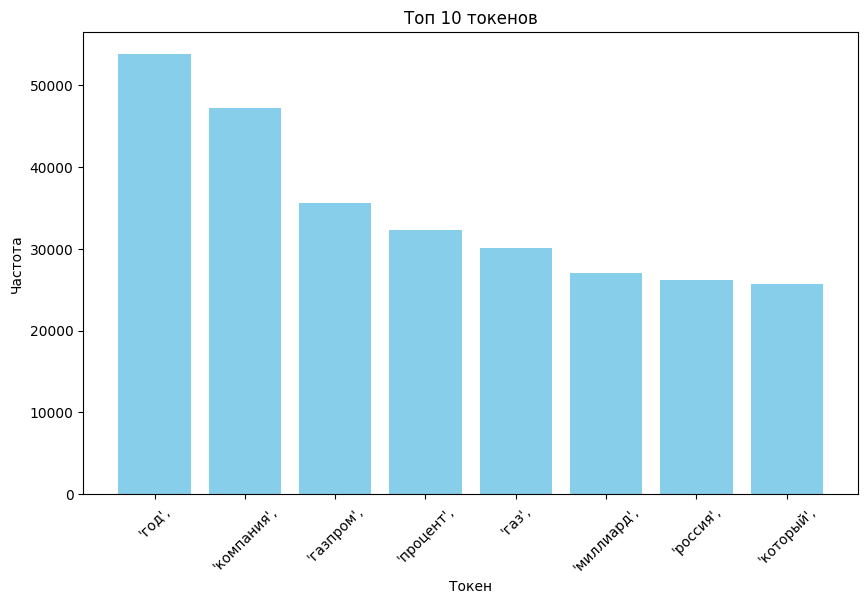

In [35]:
import matplotlib.pyplot as plt

top_tokens = token_freq.most_common(10)[2:]
tokens, frequencies = zip(*top_tokens)

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies, color='skyblue')
plt.xlabel('Токен')
plt.ylabel('Частота')
plt.title('Топ 10 токенов')
plt.xticks(rotation=45)
plt.show()


In [36]:
df

,Title,Date,Source,Text,Stock,Target,Text_preprocessed,Tokens
0,Акционер «Газпрома» захотел судиться,2018-07-04 00:00:00,lenta.ru,Миноритарный акционер «Газпрома» Леонид Пронин...,GAZP,0,миноритарный акционер газпрома леонид пронин п...,"[миноритарный, , акционер, , газпром, , лео..."
1,Против гонщиков на Gelandewagen возбудили еще ...,2016-06-09 00:00:00,lenta.ru,Следственный комитет России возбудил еще одно ...,LKOH,0,следственный комитет россии возбудил еще одно ...,"[следственный, , комитет, , россия, , возбу..."
2,«Роснефть» выиграла аукцион на Эргинский участ...,2017-07-17 00:00:00,lenta.ru,«Роснефть» выиграла аукцион на крупнейший учас...,GAZP,0,роснефть выиграла аукцион на крупнейший участо...,"[роснефть, , выигрывать, , аукцион, , крупн..."
3,Ляшко рассказал о газовом обмане украинцев,2020-02-02 04:30:00,ria.ru,"МОСКВА, 8 фев — РИА Новости. Власти Украины об...",GAZP,0,москва фев риа новости власти украины обманы...,"[москва, , фев, , риа, , новость, , власть..."
4,Российские богачи стали еще богаче,2019-11-25 00:00:00,lenta.ru,Совокупное состояние самых успешных российских...,LKOH,0,совокупное состояние самых успешных российских...,"[совокупный, , состояние, , самый, , успешн..."
...,...,...,...,...,...,...,...,...
20188,Газпромбанк получит долю в угольном проекте «М...,2016-04-06 00:00:00,lenta.ru,«Мечел» договорился с Газпромбанком о продаже ...,GAZP,0,мечел договорился с газпромбанком о продаже до...,"[мечесть, , договариваться, , газпромбанк, ..."
20189,Транспортная прокуратура обнаружила в Шереметь...,2017-09-11 00:00:00,lenta.ru,Генеральный директор компании «Газпромнефть — ...,GAZP,0,генеральный директор компании газпромнефть аэ...,"[генеральный, , директор, , компания, , газ..."
20190,Шесть крупнейших банков России сообщили о мног...,2009-02-17 00:00:00,lenta.ru,В январе 2009 года суммарный убыток от основно...,GAZP,0,в январе года суммарный убыток от основной де...,"[январь, , год, , суммарный, , убыток, , о..."
20191,"Генпрокуратура: ""Медиа-Мост"" должны были ликви...",2000-11-03 00:00:00,lenta.ru,"Глава холдинга ""Медиа-Мост"" Владимир Гусинский...",GAZP,0,глава холдинга медиамост владимир гусинский и ...,"[глава, , холдинг, , медиамост, , владимир,..."


In [37]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.8, random_state=42)

test_df, val_df = train_test_split(df, test_size=0.4, random_state=42)

print("Train size:", len(train_df))
print("Test size:", len(test_df))
print("Validation size:", len(val_df))


Train size: 4038
Test size: 12115
Validation size: 8078


In [38]:
df.to_csv('data.csv')
train_df.to_csv('train_df.csv')
val_df.to_csv('val_df.csv')
test_df.to_csv('test_df.csv')